In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import random
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [6]:
"""自己造数据 """
df=pd.DataFrame(pd.date_range(start='1/1/2019',end='31/12/2019',normalize=True),columns=['Date']) # pandas生成时间序列
df['Sales']=np.random.randint( low=100,high =500 , size = 365 )                      # 随机生成365个100-500之间的整数，实验数据，不加单位了
df['Market']=[ np.random.choice(['Market_'+i for i in 'ABC']) for c  in range(365)] # Market _A ,_B,_C
df['Month']=df['Date'].apply(lambda x : x.strftime("%m")+"月")                      # 根据日期生成月份字段

In [7]:
d1=df.groupby(["Month","Market"]).agg('sum').reset_index()                 # 按照月份、市场类型分组，求销售总额
d1['rank']=d1.groupby(["Month"])['Sales'].rank(ascending=False)           # 按照月份分组，在三个市场之间进行排序，即得到每月销量排名
d1=d1.sort_values(["Market","Month"])
d1["lmnth_sales"]=d1.groupby(["Market"])["Sales"].shift(1)
d1['pct']=round((d1['Sales']/d1['lmnth_sales']-1)*100,0)               #计算不同市场间，每月销售额环比增长率
d1['pct']=d1['pct'].fillna("").apply(lambda x : str(x).replace(".0","")+"%"*bool(x) )      #增长率转换为百分比
# d1

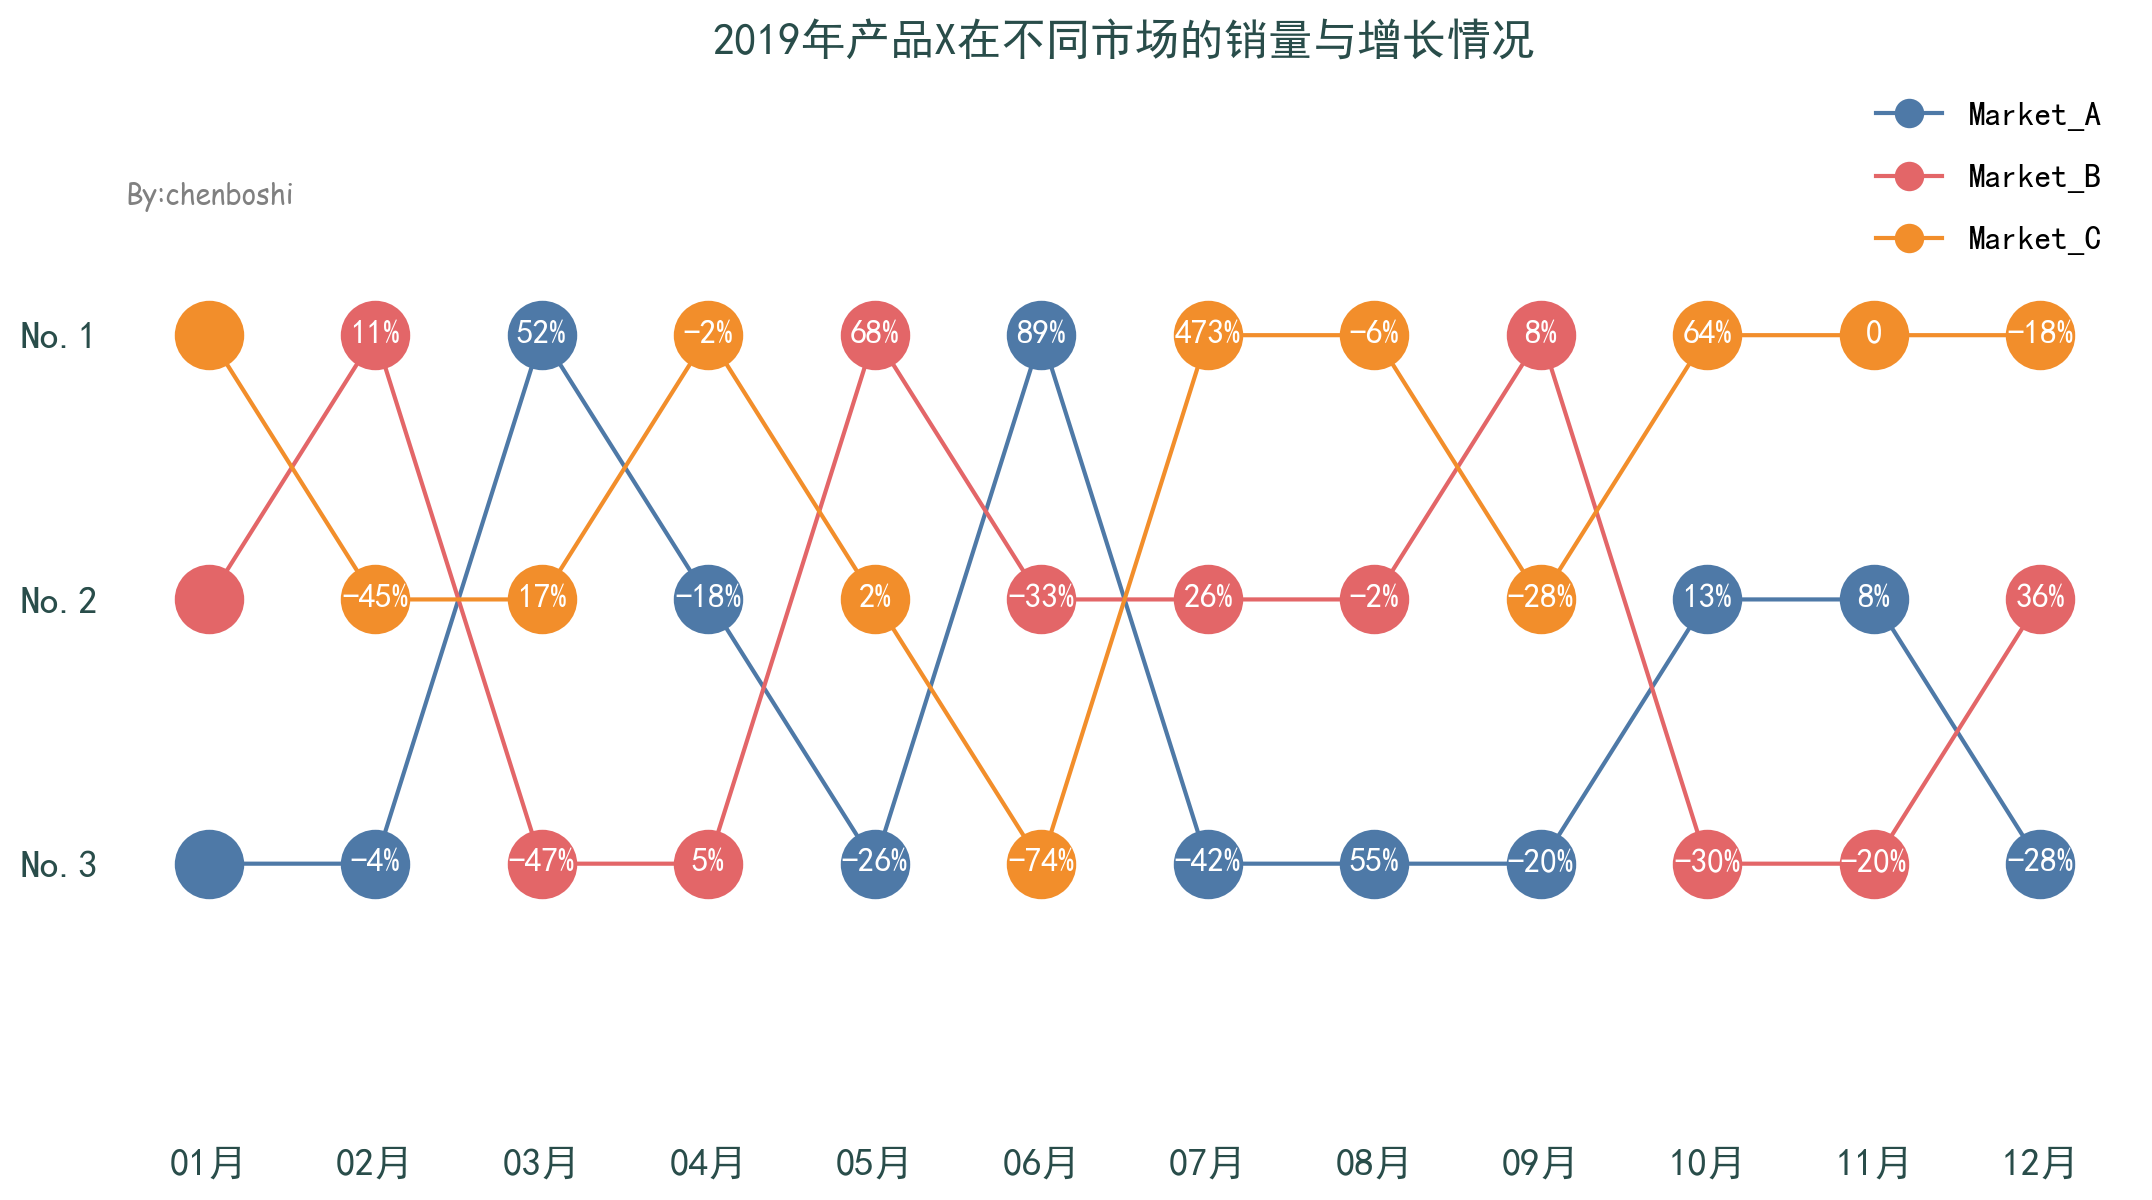

In [36]:
mcolors=["#4e79a7","#e36668","#f28e2b"]
color="#294D4A"
plt.figure(figsize=(13,7),dpi=200)
# y轴倒序  rank=1,坐标为1，在y轴比 rank=2 高
plt.ylim(4,0)
# 市场对应图例
plt.yticks([1,2,3],["No.1","No.2","No.3"],fontsize=14)

for c,m in enumerate(['Market_A', 'Market_B', 'Market_C']):
    d=d1[d1['Market']==m]
    plt.plot(d['Month'],d['rank'],linewidth=1.5,marker="o",markersize=24,color=mcolors[c])

    for x,n in enumerate(d['Month']):
        y=d[d['Month']==n]['rank'].values[0]
        s=d[d['Month']==n]['pct'].values[0]
#         print(x,y,s)
        plt.text(x=x,y=y+0.03,s=s,fontdict={"fontsize":12,"color":'w','fontweight':'heavy'},ha="center")

#显示 图例
# markersccale  图中标记大小：图例标记大小    
plt.legend(['Market_A', 'Market_B', 'Market_C'],labelspacing=1,markerscale=0.4,fontsize=12,\
          edgecolor='w',frameon=False)
# print(plt.gca())

#将刻度小横线设置为白色，标签颜色为其他颜色
plt.tick_params(axis='x',color='w',labelcolor=color,labelsize=14)
plt.tick_params(axis='y',color='w',labelcolor=color)

#隐藏y轴
# plt.yticks([])
for i in ['top','right','left','bottom']:
    plt.gca().axes.spines[i].set_visible(False)
plt.title("2019年产品X在不同市场的销量与增长情况",fontdict={'color':color,'fontsize':16})
plt.text(-0.5,0.5,"By:chenboshi",fontdict={"family":'fantasy','color':'gray','fontsize':10})
plt.savefig(r"C:\mypython\plots\BumpCharts.png")
plt.show()
plt.close()